In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [35]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


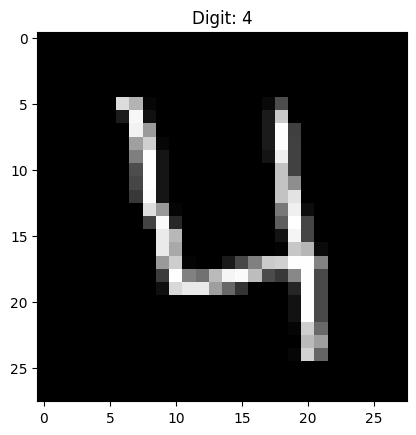

In [51]:
# Get an example of one of the the numbers (28, 28)
def plotdigit(row):
    row_data = data.iloc[row] # Gives us row # of the data
    label = row_data['label']
    pixels = row_data.drop('label').values # Drops the labels and converts to np array
    image = pixels.reshape(28,28)

    plt.imshow(image, cmap = 'gray')
    plt.title(f'Digit: {label}')
    plt.show()
plotdigit(3)

In [52]:
X = data.drop('label', axis = 1)
y = data['label']
X = X / 255.0 # Normalize (between 0 and 1) colors of pixels range from 0 to 255 

In [64]:
#Using Basic Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# split 80% into training and 20% int validation (random_state makes it reproducable)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10) 
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
accuracy = model.score(X_val, y_val) 
print(f'val_accuracy: {accuracy}')


val_accuracy: 0.9186904761904762


In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [81]:

model = keras.Sequential([
    layers.Input(shape = (784,)), # Each image has 784 pixels
    layers.Dense(128, activation = 'relu'), # Hidden layer 128 neurons
    layers.Dense(10, activation = 'softmax') # Output layer 10 classes
])

In [85]:
model.compile(
    optimizer = 'adam', # Adaptive Moment Estimation (supercharged gradient decent)
    loss = 'sparse_categorical_crossentropy', # Use for integers
    metrics = ['accuracy'] # Percentage of the predictions match label
)

In [86]:
model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8495 - loss: 0.5347 - val_accuracy: 0.9455 - val_loss: 0.1806
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9528 - loss: 0.1659 - val_accuracy: 0.9568 - val_loss: 0.1402
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9683 - loss: 0.1071 - val_accuracy: 0.9638 - val_loss: 0.1186
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9764 - loss: 0.0812 - val_accuracy: 0.9681 - val_loss: 0.1007
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9809 - loss: 0.0644 - val_accuracy: 0.9681 - val_loss: 0.0979
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9861 - loss: 0.0467 - val_accuracy: 0.9705 - val_loss: 0.0905
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9912 - loss: 0.0324 - val_accuracy: 0.9726 - val_loss: 0.0834
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9929 - loss: 0.0254 - 

In [99]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_data.head()
test_data = test_data / 255.0
prediction = model.predict(test_data)
predicted_labels = np.argmax(prediction, axis = 1)
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label' : predicted_labels
})

submission.to_csv('submission.csv', index = False)
print("📁 File exists:", os.path.exists('submission.csv'))

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
📁 File exists: True
